# TASK1 K-means

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

In [3]:
df = pd.read_csv("housing.csv")
#df.columns

In [3]:
df

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND


In [5]:
X = df[['housing_median_age', 'total_rooms', 'median_house_value']]
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 1)K=2

In [6]:
kmeans = KMeans(n_clusters=2)
X["Cluster"] = kmeans.fit_predict(X_scaled)
X["Cluster"] = X["Cluster"].astype("category")
#X.head()

/var/folders/jq/4bwq_gcj13q52nl2rthwnssw0000gn/T/ipykernel_69342/2504848702.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X["Cluster"] = kmeans.fit_predict(X_scaled)
/var/folders/jq/4bwq_gcj13q52nl2rthwnssw0000gn/T/ipykernel_69342/2504848702.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X["Cluster"] = X["Cluster"].astype("category")


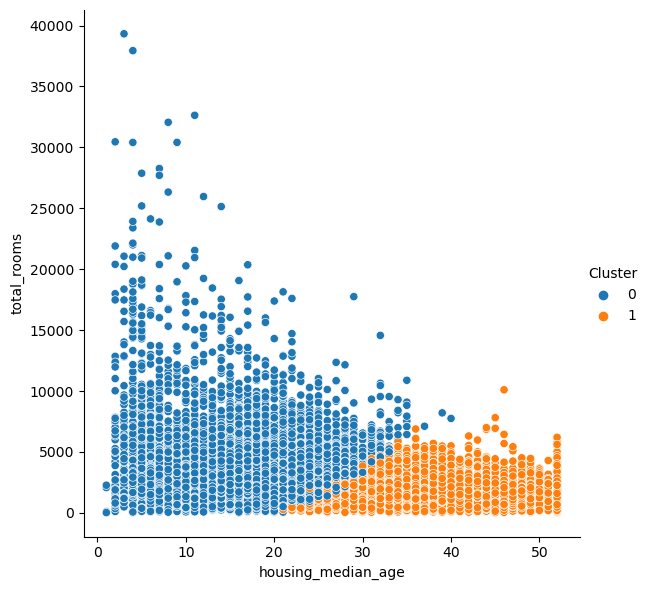

In [6]:
sns.relplot(
    x="housing_median_age", y="total_rooms", hue="Cluster", data=X, height=6,
);

# 2)K=3

In [7]:
kmeans = KMeans(n_clusters=3)
X["Cluster"] = kmeans.fit_predict(X_scaled)
X["Cluster"] = X["Cluster"].astype("category")

/var/folders/jq/4bwq_gcj13q52nl2rthwnssw0000gn/T/ipykernel_69342/204476810.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X["Cluster"] = kmeans.fit_predict(X_scaled)
/var/folders/jq/4bwq_gcj13q52nl2rthwnssw0000gn/T/ipykernel_69342/204476810.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X["Cluster"] = X["Cluster"].astype("category")


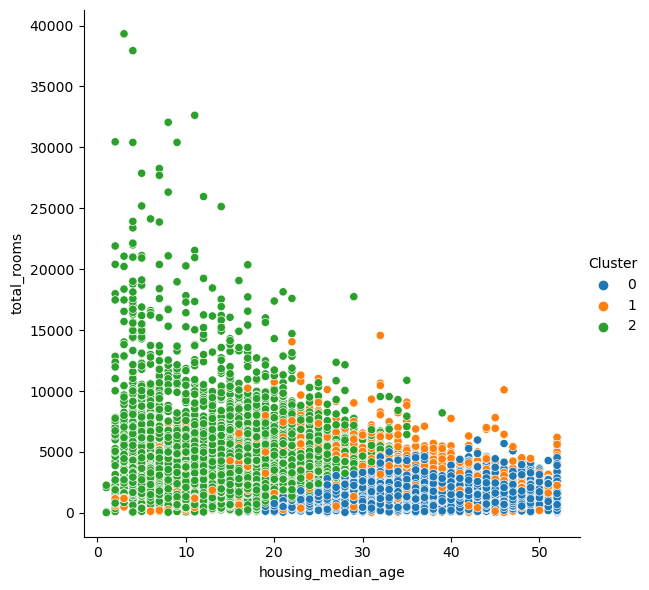

In [8]:
sns.relplot(
    x="housing_median_age", y="total_rooms", hue="Cluster", data=X, height=6,
);

# Using Silhouette Coefficient Evaluate the Perfect K Value

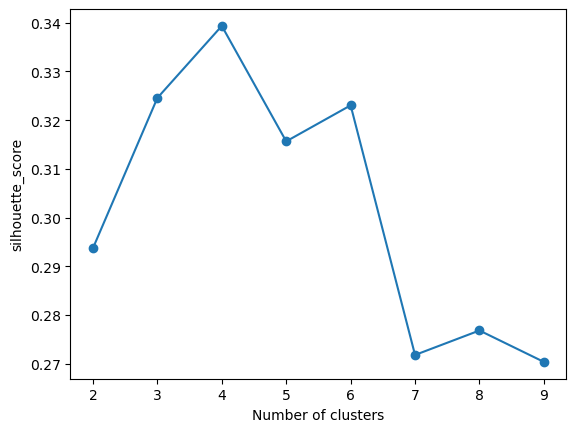

In [9]:
from sklearn import metrics
scores = []
for i in range(2, 10):
    km = KMeans(        n_clusters=i,
                        init='k-means++',
                        n_init=10,
                        max_iter=30,
                        random_state=0      )
    km.fit(X_scaled)
    scores.append(metrics.silhouette_score(X_scaled, km.labels_ , metric='euclidean'))
plt.plot(range(2,10), scores, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('silhouette_score')
plt.show()

# Running Time

In [10]:
from timeit import default_timer
start = default_timer()
duration = default_timer() - start
print(duration)

4.758400000071106e-05
